In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# <h1 style = "font-size:60px"> 🧠 **STROKE PREDICTION** </h1>

# 1. Introduction
## 1.1 Context

* According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, responsible for approximately 11% of all deaths.

* A stroke occurs when the blood supply to part of the brain is cut off or reduced, preventing the brain tissue from receiving oxygen and nutrients.

* A stroke occurs when the blood supply to the brain is cut off or reduced, preventing brain tissue from receiving oxygen and nutrients, so brain cells begin to die within minutes.

* A stroke is a medical emergency and prompt treatment is crucial. Early action can reduce brain damage and other complications.

* This data set is used to predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases, and smoking status. Each row of data provides relevant information about the patient.

## 1.2 Problem Statement

* Improper treatment of people likely to have a stroke can have serious health consequences, including brain damage and death.

## 1.3 Objective

* Understand what are the reasons that cause a stroke in people.
* Visualize the relationships between various healthy and unhealthy habits for stroke.
* Predict the probability of stroke with the best model and hyperfit parameters.

## 1.4  Available Features

**Target**
1. `stroke` - 1 if the patient had a stroke or 0 if not.


**Clinical features for predicting stroke events:**

1. `id` - Unique identifier.
1. `gender` - "Male", "Female" or "Other".
1. `age` - Age of the patient.
1. `hypertension` - 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
1. `heart_disease` - 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
1. `ever_married` - "No" or "Yes".
1. `work_type` - "Children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
1. `Residence_type` - "Rural" or "Urban".
1. `avg_glucose_level` - Average glucose level in blood.
1. `bmi` - Body mass index.
1. `smoking_status` - "formerly smoked", "never smoked", "smokes" or "Unknown".


## 1.5 Assumptions

1. Advancing age is a significant risk factor for the development of a stroke.
1. Patients with hypertension and heart disease are more likely to have a stroke compared to those without these conditions.
1. Smokers and patients with a high body mass index are correlated with a higher risk of stroke.
1. People who live in urban areas have a higher risk of having a stroke than those who live in rural areas.
1. Patients with elevated blood glucose levels are at increased risk of stroke compared to those with normal blood glucose levels.
1. People who work and live in rural areas are less likely to have a stroke than those who work and live in urban areas.
1. Married men are at higher risk of having a stroke than those who are not married.



1. La edad avanzada es un factor de riesgo significativo para el desarrollo de un accidente cerebrovascular.
1. Los pacientes con hipertensión y enfermedad cardíaca son más propensos a sufrir un accidente cerebrovascular en comparación con aquellos que no tienen estas afecciones.
1. Pacientes fumadores y con un alto índice de masa corporal se correlacionan con un mayor riesgo de accidente cerebrovascular.
1. Las personas que viven en zonas urbanas tienen un mayor riesgo de sufrir un accidente cerebrovascular que aquellos que viven en áreas rurales.
1. Los pacientes con niveles elevados de glucosa en sangre tienen un mayor riesgo de sufrir un accidente cerebrovascular en comparación con aquellos con niveles normales de glucosa en sangre.
1. Las personas que trabajan y viven zonas rurales tienen menor probabilidad de sufrir un accidente cerebrovascular en comparación de los que trabajan y viven en zonas urbanas.
1. Los hombres casados tienen mayor riesgo de sufrir un accidente cerebrovascular que aquellos que no están casados.

___
# 2. Pre-requisites and Utilities
## 2.1 Libraries

In [62]:
# Data Manipulation.
import pandas as pd
import numpy as np

# Data Visualization.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Dimencionality Reduction.
from sklearn.decomposition import PCA

# Warnings.
import warnings
warnings.filterwarnings("ignore")

# Palette of Colors
palette = sns.husl_palette(h=.5)
palette_matrix = sns.color_palette("light:#5A9", as_cmap=True)

## 2.2 Auxiliary Functions

In [3]:
# Create a DF with the revision of the data (value count, type, null, infinity).
def df_revision(df):
    col_values_count = {i:df[i].value_counts().shape[0] for i in df.columns}
    col_dtype = {i:df[i].dtype for i in df.columns}
    col_isObj = {i:('✅' if df[i].dtype in ['object', 'string'] else '-') for i in df.columns}
    col_na = {i:('✅' if df[i].isna().any() == True else '-') for i in df.columns}
    col_inf = {i:('✅' if df[i].isin([np.inf, - np.inf]).any() == True else '-') for i in df.columns}
    
    df_revision = pd.DataFrame([col_values_count, col_dtype, col_isObj, col_na, col_inf], index=['Values_Count', 'DType','Is_Obj', 'NA', 'inf']).transpose()
    return df_revision

___
# 3. Data Wrangling

## 3.1 Data Load



In [4]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3.2 Descriptive Analysis

### 3.2.1 Statistics of Categorical and Numerical Data

In [5]:
df.describe(include='all').fillna('-').round(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.0,5110,5110.0,5110.0,5110.0,5110,5110,5110,5110.0,4909.0,5110,5110.0
unique,-,3,-,-,-,2,5,2,-,-,4,-
top,-,Female,-,-,-,Yes,Private,Urban,-,-,never smoked,-
freq,-,2994,-,-,-,3353,2925,2596,-,-,1892,-
mean,36517.829354,-,43.226614,0.097456,0.054012,-,-,-,106.147677,28.893237,-,0.048728
std,21161.721625,-,22.612647,0.296607,0.226063,-,-,-,45.28356,7.854067,-,0.21532
min,67.0,-,0.08,0.0,0.0,-,-,-,55.12,10.3,-,0.0
25%,17741.25,-,25.0,0.0,0.0,-,-,-,77.245,23.5,-,0.0
50%,36932.0,-,45.0,0.0,0.0,-,-,-,91.885,28.1,-,0.0
75%,54682.0,-,61.0,0.0,0.0,-,-,-,114.09,33.1,-,0.0


<div class="alert alert-success" role="alert">
  <p> 🔎 In all the characteristics there are 5,110 copies except the characteristic "bmi".</p>
  <p> 🔎 The scales in the numerical characteristics are very different. </p>
  <p> 🔎 The dispersion of the data in characteristics such as "age" and "Glucose level is high.</p>
  <p> </p>
</div>

### 3.2.2 Data Revision

In [6]:
# The 'df revision' auxiliary function is used.
df_revision(df)

,Values_Count,DType,Is_Obj,NA,inf
id,5110,int64,-,-,-
gender,3,object,✅,-,-
age,104,float64,-,-,-
hypertension,2,int64,-,-,-
heart_disease,2,int64,-,-,-
ever_married,2,object,✅,-,-
work_type,5,object,✅,-,-
Residence_type,2,object,✅,-,-
avg_glucose_level,3979,float64,-,-,-
bmi,418,float64,-,✅,-


<div class="alert alert-success" role="alert">
  <p> 🔎 The "id" feature does not add value in the analysis because it is different for each instance.</p>
  <p> 🔎 We have categorical features that will have to be coded for analysis.</p>
  <p> 🔎 The characteristic "bmi" has null values.</p>
  <p> 🔎 The data does not contain infinite values.</p>
  <p> </p>
</div>

### 3.2.3 Count Values of Target 

In [7]:
stroke_count = pd.DataFrame(df['stroke'].value_counts()).rename({'stroke':'Count'}, axis=1)
stroke_count_percent = ((pd.DataFrame(df['stroke'].value_counts())/len(df))*100).round(2).rename({'stroke':'Percent'}, axis=1)

pd.concat([stroke_count, stroke_count_percent], axis=1)

,Count,Percent
0,4861,95.13
1,249,4.87


<div class="alert alert-success" role="alert">
  <p> 🔎 We have data with a high level of imbalance.</p>
  <p> 🔎 95% of patients have not had a stroke.</p>
  <p> 🔎 Only 5% of patients in the entire dataset have had a stroke.</p>
  <p> </p>
</div>

## 3.3 Pre-processing

### 3.3.1 Remove Unnecessary Categories

In [8]:
# Delete of feature "id"
df = df.drop('id', axis=1)

<div class="alert alert-success" role="alert">
  <p> 🔎 We removed the "id" feature because it generates noise in the analysis.</p>
  <p> </p>
</div>

### 3.3.2 Missing Values

In [9]:
# The NA in the 'bmi' feature are reviewed.
bmi_na = df['bmi'].isna().sum()

# Get the Mean of the feature 'bmi'.
bmi_str = df['bmi'].std().round(2)

# Get the Mean of the feature 'bmi'.
bmi_median = df['bmi'].median().round(2)

# We fill NA of the feature 'bmi' with the median of its values.
df['bmi'] = df['bmi'].fillna(bmi_median)

print("'bmi' NA count: ", bmi_na)
print("'bmi' Str : ", bmi_str)
print("'bmi' Median : ", bmi_median)
print("'bmi' NA count after fill: ", df['bmi'].isna().sum())

'bmi' NA count:  201
'bmi' Str :  7.85
'bmi' Median :  28.1
'bmi' NA count after fill:  0


<div class="alert alert-success" role="alert">
  <p> 🔎 The Median of the 'bmi' data is used to fill in the NA values.</p>
  <p> 🔎 The standard deviation in the data is high, so it is decided to use the Median.</p>
  <p> 🔎 The mean is not used to prevent outliers from over-altering the data.</p>
  <p> </p>
</div>

### 3.3.2 Encode Features

In [10]:
# Get the features of type object.
col_encode = df.select_dtypes(include='object').columns

# Object type features are coded.
df_encode = pd.get_dummies(df, columns=col_encode, prefix_sep='_', drop_first=True)
df_encode.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


<div class="alert alert-success" role="alert">
  <p> 🔎 Object type features are codified in order to obtain correlations with numerical features.</p>
  <p> 🔎 The 'drop_first' hyperparameter is used to denoise encoded features.</p>
  <p> 🔎 The DF 'df_encode' is used in the "Distribution of Features According to Target" and "Matrix Correlation" graph.</p>
  <p> </p>
</div>

### 3.3.3 Separate Features

In [11]:
# Categorical Features (Delete Target Because it's a Features of Type "int64").
features_cat = df.select_dtypes(include=['object', 'int64']).columns
features_cat = features_cat.drop(['stroke'])

# Numerical Features.
features_num = df.select_dtypes(include='float64').columns

# Target.
target = df['stroke']

# Encode Features of DataFrame without Target.
features_encode = df_encode.drop(['stroke'], axis=1)

<div class="alert alert-success" role="alert">
  <p> 🔎 The created DFs are used for the "Univariate Analysis"</p>
  <p> </p>
</div>

### 3.3.4 Dimensionality Reduction (PCA)

In [12]:
# The Principal Component Analysis (PCA) transformer is instantiated.
pca = PCA(n_components=2)
# The features of the DF "feature encoder" are transformed into 2 main features.
df_pca = pca.fit_transform(features_encode)

# A DF is created with the result of the transformation.
df_pca = pd.DataFrame(df_pca, columns=['feature_1','feature_2'])

# A DF is created with the result of the transformation.
df_reduce = pd.concat([df_pca, df['stroke']], axis=1)

# It is obtained that both the variance was preserved.
variance = ((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100).round(2)

print(f"After PCA the variance for each feature was preserved in a: {variance}%\n")
print(df_reduce.head())

After PCA the variance for each feature was preserved in a: 97.96%

    feature_1  feature_2  stroke
0  124.928142  -5.024924       1
1   97.576797  -2.340395       1
2    5.547777 -36.531708       1
3   65.341816   3.897361       1
4   72.470168 -23.948346       1


<div class="alert alert-success" role="alert">
  <p> 🔎 The extraction of the features is carried out to be able to visualize the distribution of the data of the DF.</p>
  <p> 🔎 The DF 'df_reduce' is used in the "Distribution of Features According to Target" graph.</p>
  <p> 🔎 Using "pca.explained_variance_ratio_" we can see how the variance was preserved for each characteristic of the target data set with respect to the original.</p>
  <p> </p>
</div>

___
# 4. Visual Analysis
## 4.2 Graphical Representation of Data Distribution

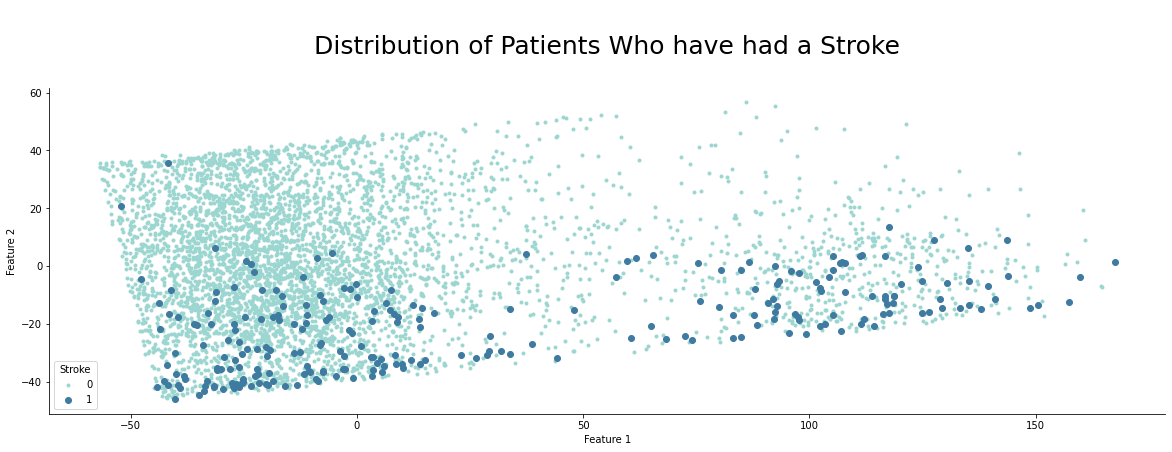

In [13]:
# Patients who have not had Stroke.
no_stroke = [df_reduce["feature_1"][df_reduce['stroke'] == 0], df_reduce["feature_2"][df_reduce['stroke'] == 0]]
# Patients who have had Stroke.
yes_stroke = [df_reduce["feature_1"][df_reduce['stroke'] == 1], df_reduce["feature_2"][df_reduce['stroke'] == 1]]

# Plot.
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(no_stroke[0], no_stroke[1], c="#9CD6D0", marker=".") # Green
ax.scatter(yes_stroke[0], yes_stroke[1], c="#3F7BA1", marker="o") # Blue
ax.set_title(f"\nDistribution of Patients Who have had a Stroke\n", fontsize=25)
ax.legend(df['stroke'].value_counts().index, title="Stroke", loc="lower left")
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()

<div class="alert alert-success" role="alert">
  <p> 🔎 Intuitions of the distribution for the model are obtained.</p>
  <p> </p>
</div>

## 4.2 Univariate Analysis
### 4.2.1 Visualization of Categorical Features

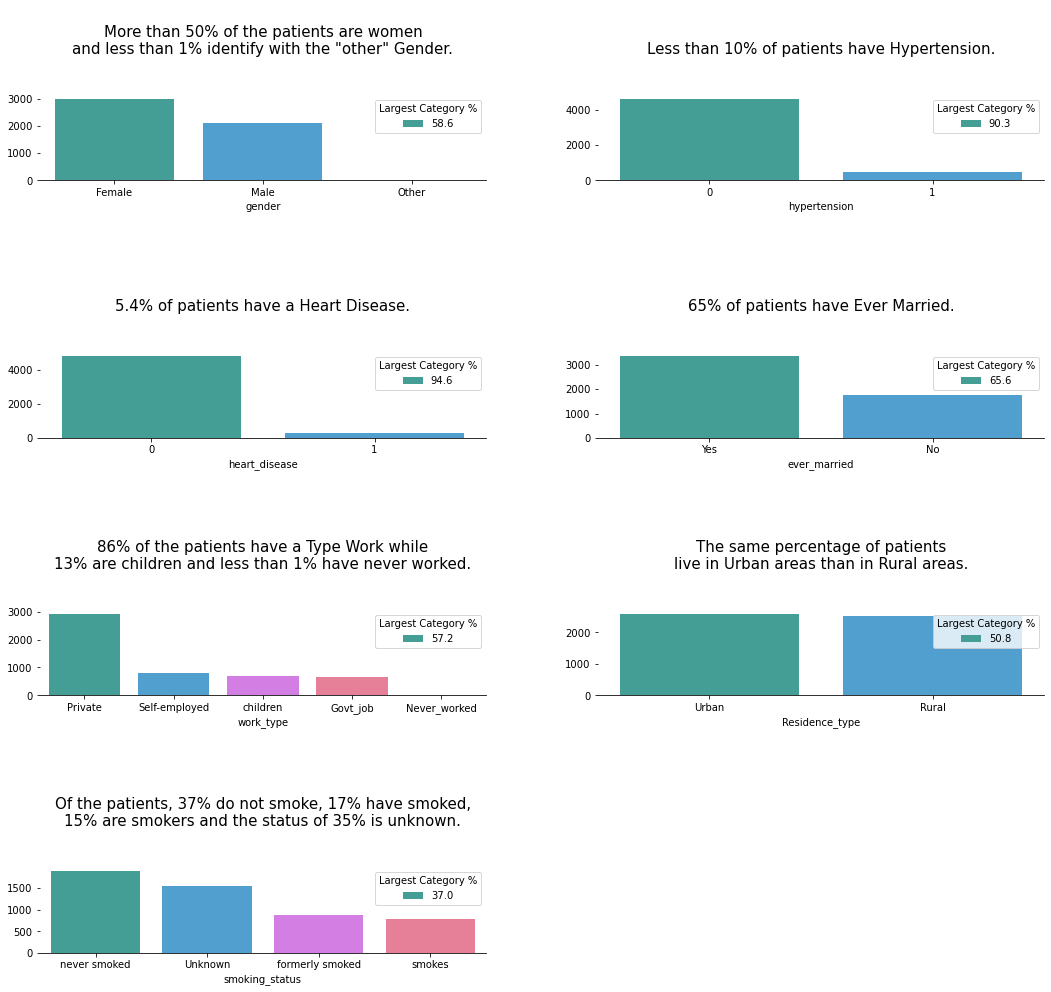

In [14]:
# Plot Description.
description = [str(f'\nMore than 50% of the patients are women\nand less than 1% identify with the "other" Gender.\n\n'),
               str(f'Less than 10% of patients have Hypertension.\n\n'),
               str(f'5.4% of patients have a Heart Disease.\n\n'),
               str(f'65% of patients have Ever Married.\n\n'),
               str(f'86% of the patients have a Type Work while\n13% are children and less than 1% have never worked.\n\n'),
               str(f'The same percentage of patients\nlive in Urban areas than in Rural areas.\n\n'),
               str(f'Of the patients, 37% do not smoke, 17% have smoked,\n15% are smokers and the status of 35% is unknown.\n\n')]

# Grid Plot.
fig = plt.figure(figsize=(18,30))
gs =  gridspec.GridSpec(7,2)
gs.update(wspace=0.25, hspace=2.0)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_cat.values):
    ax = plt.subplot(gs[i])
    sns.countplot(df[j], palette=palette, order=[x for x in df[j].value_counts().index])
    ax.set_title(description[i], fontsize=15)
    ax.legend([((x/len(df)*100).round(1)) for x in df[j].value_counts().values], title='Largest Category %')
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')
    
plt.show()

<div class="alert alert-success" role="alert">
  <p> 🔎 Features like "Hypertension" and "Heart Disease" are very unbalanced.</p>
  <p> 🔎 Features like "Gender" and "Work Type" have categories with less than 0% of the data.</p>
  <p> 🔎 "Smoking Status" Feature se desconoce el status del 35% de los pacientes (categoria "Unknown"). </p>
  <p> </p>
</div>

### 4.2.2 Visualization of Count Features

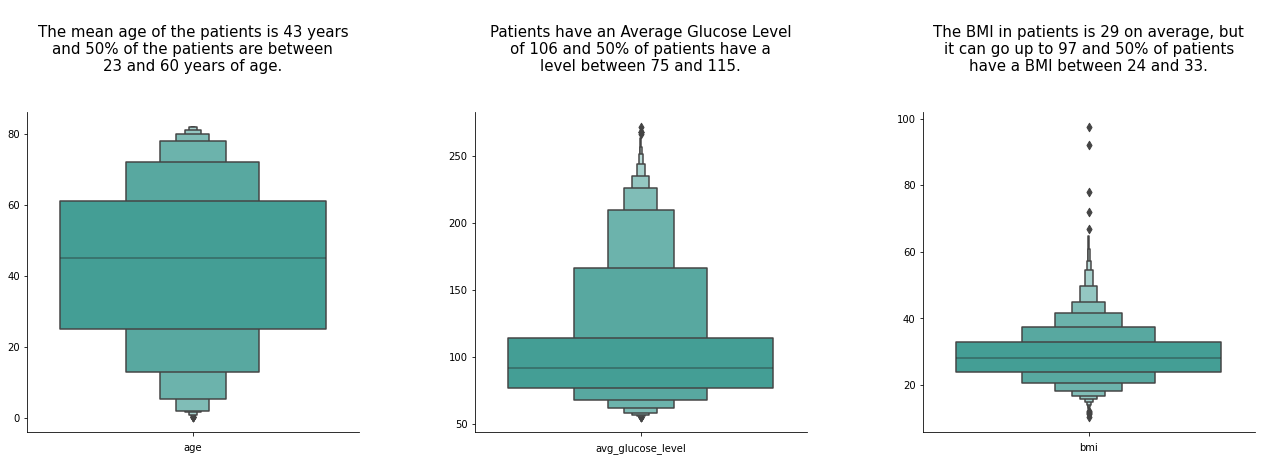

In [15]:
# Plot Description.
description = [str(f'\nThe mean age of the patients is 43 years\nand 50% of the patients are between\n23 and 60 years of age.\n\n'),
               str(f'Patients have an Average Glucose Level\nof 106 and 50% of patients have a\nlevel between 75 and 115.\n\n'),
               str(f'The BMI in patients is 29 on average, but\nit can go up to 97 and 50% of patients\nhave a BMI between 24 and 33.\n\n')]

# Grid Plot.
fig = plt.figure(figsize=(22,20))
gs = gridspec.GridSpec(3,3)
gs.update(wspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_num.values):
    ax = plt.subplot(gs[i])
    sns.boxenplot(y=df[j], palette=palette)
    ax.set_title(description[i], fontsize=15)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')

<div class="alert alert-success" role="alert">
  <p> 🔎 The "Age" Feature has a gaussian distribution.</p>
  <p> 🔎 The Features "AVG Glucose Level" and "BMI" have a right-skewed distribution.</p>
  <p> 🔎 All the features have outliers but "BMI" is the one with the most marked ones.</p>
  <p> </p>
</div>

### 4.2.3 Visualization of Target

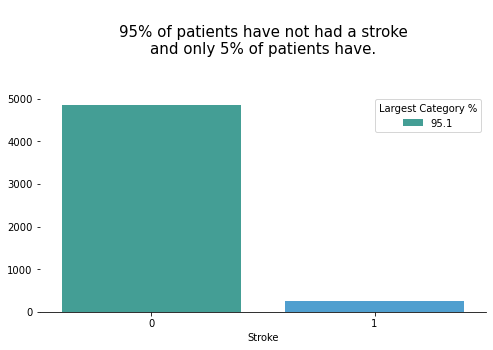

In [16]:
# Plot.
fig, ax = plt.subplots(figsize=(8, 4))
ax= sns.countplot(target, palette=palette)
ax.set_title(f"\n95% of patients have not had a stroke\nand only 5% of patients have.\n\n", fontsize=15)
ax.legend((target.value_counts()/len(df)*100).round(1), title='Largest Category %')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_xlabel('Stroke')
ax.set_ylabel('')

plt.show()

<div class="alert alert-success" role="alert">
  <p> 🔎 The data of the patients who have had a stroke are unbalanced.</p>
  <p> 🔎 The "Stroke" feature is the label that will be used for the classification model.</p>
  <p> 🔎 The imbalance directly affects the generalization capacity of the classifier since it assumes that the sample sets per class are balanced.</p>
  <p> 🔎 The data will have to be balanced with a transformer like "Smote".</p>
  <p> </p>
</div>

## 4.3 Correlation of the Features

### 4.3.1 Matrix Correlation

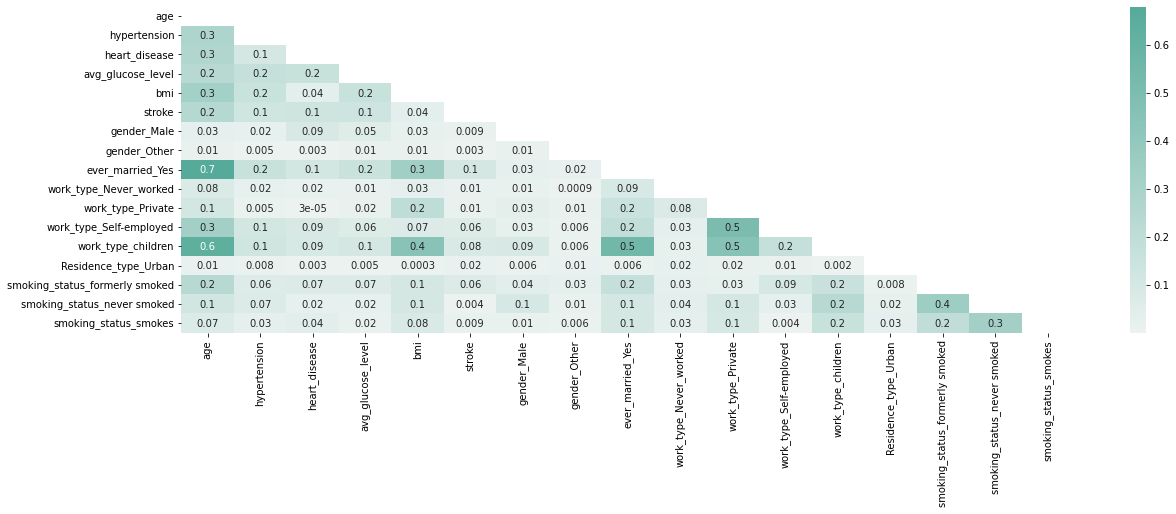

In [63]:
plt.subplots(figsize=(20,6))

df_corr = abs(df_encode.corr())
mask = np.triu(df_corr)

sns.heatmap(df_corr, annot=True, fmt='.1g', cmap=palette_matrix, cbar=True, mask = mask)

plt.show()

### 4.3.2 Higher Correlation with the Target

<AxesSubplot:>

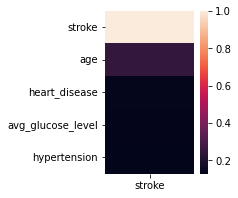

In [55]:
plt.subplots(figsize=(2,3))

df_corr = abs(df_corr.head())

sns.heatmap(df_corr)

In [28]:
df_corr = pd.DataFrame(df_corr['stroke'].sort_values(ascending=False))
df_corr.head()

,stroke
stroke,1.000000
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904


### 4.3.3 Less Correlation with the Target

In [29]:
df_corr.tail()

,stroke
work_type_Private,0.011888
gender_Male,0.009117
smoking_status_smokes,0.008939
smoking_status_never smoked,0.004129
gender_Other,0.003166


## 4.4 Distribution of Features According to Target

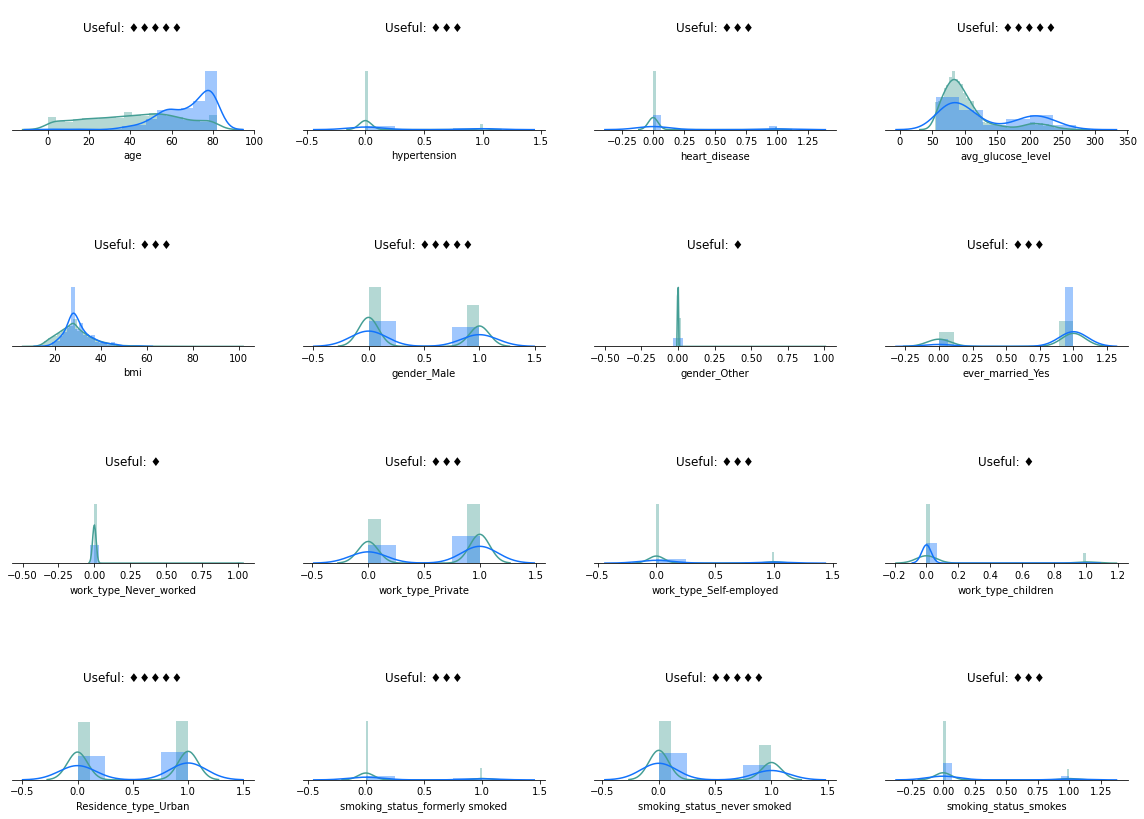

In [49]:
# Plot Description.
description = [str(f'\nUseful: ♦️♦️♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️♦️♦️\n\n'),
               str(f'Useful: ♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️\n\n'),
               str(f'Useful: ♦️♦️♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️♦️♦️\n\n'),
               str(f'Useful: ♦️♦️♦️\n\n'),]

# Plot.
plt.figure(figsize=(20,45))
gs = gridspec.GridSpec(12,4)
gs.update(hspace=2.5, wspace=.2)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_encode):
    ax = plt.subplot(gs[i])
    sns.distplot(df_encode[j][df_encode['stroke']==0], color='#449E95') # Green
    sns.distplot(df_encode[j][df_encode['stroke']==1], color='#1273FC') # Blue
    ax.set_title(description[i], fontsize=12)
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')
    ax.tick_params(left=False)
    ax.set_yticklabels([])

plt.show()

<div class="alert alert-success" role="alert">
  <p> 🔎 Institutions are obtained on the features that can most influence the classifier.</p>
  <p> 🔎 The 5 Features that can influence the model the most are "age", "bmi", "gender_Male", "Residence_type_Urban" and "smoking_status_never smoked".</p>
  <p> 🔎 The 3 Features that can least influence the model are "gender_Other", "work_type_Never_worked" and "work_type_children".</p>
  <p> </p>
</div>